In [20]:
import numpy as np
import matplotlib.pyplot as plt

class EpsilonGreedyAdSlot:
    def __init__(self, n_slots, epsilon=0.1):
        self.n_slots = n_slots
        self.epsilon = epsilon  # Exploration rate
        # True click-through rates (CTR) for each slot (unknown)
        self.true_ctrs = np.random.rand(n_slots)
        # Estimated CTRs for each slot (learned over time)
        self.estimated_ctrs = np.zeros(n_slots)
        # Number of times each slot has been selected
        self.counts = np.zeros(n_slots)
        # Total clicks
        self.total_clicks = 0

    def select_slot(self):
        """Select a slot using the epsilon-greedy strategy."""
        if np.random.rand() < self.epsilon:
            # Explore: randomly select a slot
            return np.random.randint(0, self.n_slots)
        else:
            # Exploit: select the slot with the highest estimated CTR
            return np.argmax(self.estimated_ctrs)

    def show_ad(self, slot):
        """Simulate showing an ad in the selected slot and return whether a click occurred (1 for click, 0 for no click)."""
        return 1 if np.random.rand() < self.true_ctrs[slot] else 0

    def update_estimates(self, slot, reward):
        """Update the estimated CTR for the slot based on the observed click/no-click (reward)."""
        self.counts[slot] += 1
        # Update the estimated CTR using the average of observed results
        self.estimated_ctrs[slot] += (reward - self.estimated_ctrs[slot]) / self.counts[slot]
        if reward:
            self.total_clicks += 1

In [21]:
def epsilon_greedy_strategy(ad_bandit, n_impressions):
    total_rewards = 0
    rewards = []
    slot_selections = np.zeros(ad_bandit.n_slots)

    for _ in range(n_impressions):
        # Select a slot using epsilon-greedy
        slot = ad_bandit.select_slot()
        # Show the ad in the selected slot
        reward = ad_bandit.show_ad(slot)
        # Update the estimated CTR based on the result
        ad_bandit.update_estimates(slot, reward)
        # Track rewards and slot selections
        total_rewards += reward
        rewards.append(total_rewards)
        slot_selections[slot] += 1

    return rewards, slot_selections

In [22]:
# Parameters
n_slots = 4           # Number of ad slots (top banner, sidebar, footer, pop-up)
n_impressions = 1000  # Number of ad impressions
epsilon = 0.1         # Exploration rate

# Create the epsilon-greedy bandit
ad_bandit = EpsilonGreedyAdSlot(n_slots, epsilon)

# Run the epsilon-greedy strategy
rewards, slot_selections = epsilon_greedy_strategy(ad_bandit, n_impressions)



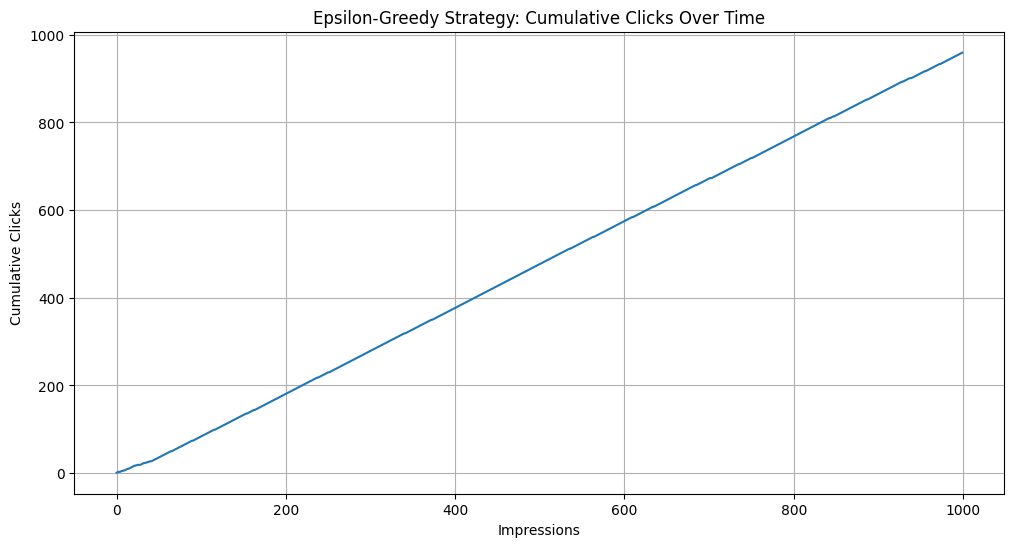

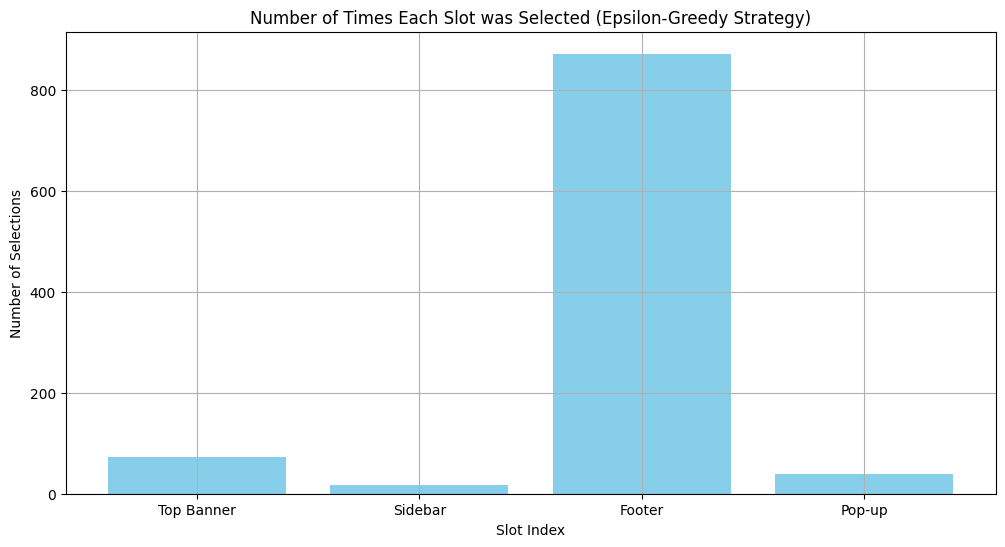

In [23]:

# Visualization: Cumulative Clicks Over Time
plt.figure(figsize=(12, 6))
plt.plot(rewards)
plt.xlabel('Impressions')
plt.ylabel('Cumulative Clicks')
plt.title('Epsilon-Greedy Strategy: Cumulative Clicks Over Time')
plt.grid(True)
plt.show()

# Visualization: Number of Times Each Slot was Selected
plt.figure(figsize=(12, 6))
plt.bar(range(n_slots), slot_selections, color='skyblue')
plt.xlabel('Slot Index')
plt.ylabel('Number of Selections')
plt.title('Number of Times Each Slot was Selected (Epsilon-Greedy Strategy)')
plt.xticks(range(n_slots), ['Top Banner', 'Sidebar', 'Footer', 'Pop-up'])
plt.grid(True)
plt.show()

In [25]:
print(ad_bandit.true_ctrs)
print(ad_bandit.estimated_ctrs)

[0.66765893 0.57534717 0.98975704 0.93853315]
[0.64383562 0.64705882 0.99081515 0.97435897]
